In [1]:
import json

with open('dataset_config.json', 'r') as f:
    data = json.load(f)

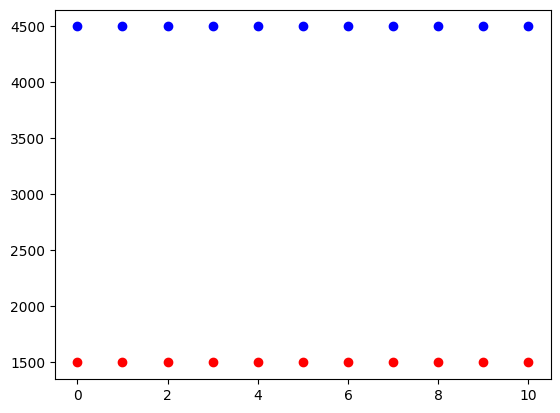

In [6]:
import matplotlib.pyplot as plt

min_max_list = []
for key, value in data.items():
    min_max_list.append((value['label_min'], value['label_max']))

# Plot the min and max values, with the a different color for each dataset
plt.scatter(range(len(min_max_list)), [min_max[0] for min_max in min_max_list], c='red')
plt.scatter(range(len(min_max_list)), [min_max[1] for min_max in min_max_list], c='blue')
plt.show()


In [7]:
# Convert to pd df
import pandas as pd
df = pd.DataFrame(data, )

In [18]:
df.loc['data_max','flatvel-b']

np.float64(56.05)

In [25]:
df

,flatvel-a,curvevel-a,flatvel-b,curvevel-b,flatfault-a,curvefault-a,flatfault-b,curvefault-b,style-a,style-b,flatvel-tutorial
data_min,-26.950,-27.110,-27.170,-29.040,-26.100,-26.480,-24.860,-24.930,-24.960,-23.760,-26.950
data_max,52.770,55.100,56.050,57.030,50.860,52.320,50.280,50.980,48.930,46.010,52.770
label_min,1500.000,1500.000,1500.000,1500.000,1500.000,1500.000,1500.000,1500.000,1500.000,1500.000,1500.000
label_max,4500.000,4500.000,4500.000,4500.000,4500.000,4500.000,4500.000,4500.000,4500.000,4500.000,4500.000
file_size,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,120.000
nbc,120.000,120.000,120.000,120.000,120.000,120.000,120.000,120.000,120.000,120.000,120.000
dx,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
nt,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
dt,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
f,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000


In [26]:
rows = list(df.index)

# Let's see which rows have ALL identical values
columns = list(df.columns)

for row in rows:
    first_val = df.loc[row][columns[0]]
    for col in columns[1:]:
        if df.loc[row][col] != first_val:
            print(f"{row} has different values: {first_val} and {df.loc[row][col]}")
            break


data_min has different values: -26.95 and -27.11
data_max has different values: 52.77 and 55.1
file_size has different values: 500.0 and 120.0


In [28]:
data["all"] = data["flatvel-a"]
data["all"]["data_min"] = min(df.loc["data_min"])
data["all"]["data_max"] = max(df.loc["data_max"])

In [29]:
with open('dataset_config.json', 'w') as f:
    json.dump(data, f)